In [53]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 300
pd.options.display.float_format = "{:.2f}".format

seed = 420
tf.random.set_seed(seed)
np.random.seed(seed)

print("Imported modules.")

Imported modules.


In [54]:
dataFrame = pd.read_csv("bodyfat.csv")
dataFrame = dataFrame.reindex(np.random.permutation(dataFrame.index))

#add bmi feature cross
dataFrame['BMI'] = dataFrame['Height'] / (dataFrame['Weight'] * dataFrame['Weight'])
dataFrame['StaticWaistRatio'] = (dataFrame['Ankle'] + dataFrame['Knee'] + dataFrame['Wrist'])/dataFrame['Abdomen']
dataFrame['ChestNeckRatio'] = dataFrame['Chest'] / dataFrame['Neck']
dataFrame['ChestWaistRatio'] = dataFrame['Chest'] / dataFrame['Abdomen']
dataFrame['HipThighRatio'] = dataFrame['Hip'] / dataFrame['Thigh']
dataFrame['ForearmWristRatio'] = dataFrame['Forearm'] / dataFrame['Wrist']
dataFrame['ForearmBicepRatio'] = dataFrame['Biceps'] / dataFrame['Wrist']

dataFrame = dataFrame.drop(columns=['Density', 'Height', 'Weight', 'Abdomen','Chest','Hip','Thigh'])

print("Data set loaded. Num examples: ", len(dataFrame))

trainDF = dataFrame.sample(frac = 0.8)
testDF = dataFrame.drop(trainDF.index)

print("Made training and test sets")

dataFrame.describe()

Data set loaded. Num examples:  252
Made training and test sets


,BodyFat,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,BMI,StaticWaistRatio,ChestNeckRatio,ChestWaistRatio,HipThighRatio,ForearmWristRatio,ForearmBicepRatio
count,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00
mean,19.15,44.88,37.99,38.59,23.10,32.27,28.66,18.23,0.00,0.87,2.65,1.09,1.69,1.57,1.77
std,8.37,12.60,2.43,2.41,1.69,3.02,2.02,0.93,0.00,0.07,0.14,0.06,0.07,0.09,0.13
min,0.00,22.00,31.10,33.00,19.10,24.80,21.00,15.80,0.00,0.65,2.27,0.92,1.45,1.04,1.38
25%,12.47,35.75,36.40,36.98,22.00,30.20,27.30,17.60,0.00,0.82,2.57,1.06,1.64,1.53,1.68
50%,19.20,43.00,38.00,38.50,22.80,32.05,28.70,18.30,0.00,0.87,2.64,1.09,1.69,1.58,1.77
75%,25.30,54.00,39.42,39.92,24.00,34.32,30.00,18.80,0.00,0.92,2.74,1.13,1.73,1.62,1.86
max,47.50,81.00,51.20,49.10,33.90,45.00,34.90,21.40,0.00,1.07,3.09,1.27,1.87,2.07,2.10


In [55]:
# Keras Input tensors of float values.
inputs = {
    'Age':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Age'),
    'BMI':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='BMI'),
    'ChestNeckRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ChestNeckRatio'),
    'ChestWaistRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ChestWaistRatio'),
    'HipThighRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='HipThighRatio'),
    'Neck':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Neck'),
    'ForearmWristRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ForearmWristRatio'),
    'ForearmBicepRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ForearmBicepRatio'),
    'Knee':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Knee'),
    'Ankle':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Ankle'),
    'Biceps':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Biceps'),
    'Forearm':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Forearm'),
    'Wrist':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Wrist'),
    'StaticWaistRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='StaticWaistRatio')
}

#Normalise
age_boundaries = [0, 30, 40, 50, 60, 70, float('inf')]

age = tf.keras.layers.Normalization(
    name = 'normalization_age',
    axis=None)
age.adapt(trainDF['Age'])
age = age(inputs.get('Age'))

age = tf.keras.layers.Discretization(
    bin_boundaries=age_boundaries,
    name='discretization_age')(age)


bmi_boundaries = np.linspace(1.84,12.4, 7+1)

bmi = tf.keras.layers.Normalization(
    name = 'normalization_BMI',
    axis=None)
bmi.adapt(trainDF['BMI'])
bmi = bmi(inputs.get('BMI'))

bmi = tf.keras.layers.Discretization(
    bin_boundaries=bmi_boundaries,
    name='discretization_bmi')(bmi)

#chestneck

chestneckratio_boundaries = np.linspace(1,4, 9+1)

chestneckratio = tf.keras.layers.Normalization(
    name = 'normalization_chestneckratio',
    axis=None)
chestneckratio.adapt(trainDF['ChestNeckRatio'])
chestneckratio = chestneckratio(inputs.get('ChestNeckRatio'))

chestneckratio = tf.keras.layers.Discretization(
    bin_boundaries=chestneckratio_boundaries,
    name='discretization_chestneckratio')(chestneckratio)

#chestwaist

chestwaistratio_boundaries = np.linspace(0.5,2, 9+1)

chestwaistratio = tf.keras.layers.Normalization(
    name = 'normalization_chestwaistratio',
    axis=None)
chestwaistratio.adapt(trainDF['ChestWaistRatio'])
chestwaistratio = chestwaistratio(inputs.get('ChestWaistRatio'))

chestwaistratio = tf.keras.layers.Discretization(
    bin_boundaries=chestwaistratio_boundaries,
    name='discretization_chestwaistratio')(chestwaistratio)

#hipthigh

hipthighratio_boundaries = np.linspace(0.9,3.2, 9+1)

hipthighratio = tf.keras.layers.Normalization(
    name = 'normalization_hipthighratio',
    axis=None)
hipthighratio.adapt(trainDF['HipThighRatio'])
hipthighratio = hipthighratio(inputs.get('HipThighRatio'))

hipthighratio = tf.keras.layers.Discretization(
    bin_boundaries=hipthighratio_boundaries,
    name='discretization_hipthighratio')(hipthighratio)

neck = tf.keras.layers.Normalization(
    name = 'normalization_neck',
    axis=None)
neck.adapt(trainDF['Neck'])
neck = neck(inputs.get('Neck'))

knee = tf.keras.layers.Normalization(
    name = 'normalization_knee',
    axis=None)
knee.adapt(trainDF['Knee'])
knee = knee(inputs.get('Knee'))

ankle = tf.keras.layers.Normalization(
    name = 'normalization_ankle',
    axis=None)
ankle.adapt(trainDF['Ankle'])
ankle = ankle(inputs.get('Ankle'))

biceps = tf.keras.layers.Normalization(
    name = 'normalization_biceps',
    axis=None)
biceps.adapt(trainDF['Biceps'])
biceps = biceps(inputs.get('Biceps'))

wrist = tf.keras.layers.Normalization(
    name = 'normalization_wrist',
    axis=None)
wrist.adapt(trainDF['Wrist'])
wrist = wrist(inputs.get('Wrist'))

#forearmwrist
forearmwristratio_boundaries = np.linspace(1,2.5, 9+1)

forearmwristratio = tf.keras.layers.Normalization(
    name = 'normalization_forearmwristratio',
    axis=None)
forearmwristratio.adapt(trainDF['ForearmWristRatio'])
forearmwristratio = forearmwristratio(inputs.get('ForearmWristRatio'))

forearmwristratio = tf.keras.layers.Discretization(
    bin_boundaries=forearmwristratio_boundaries,
    name='discretization_forearmwristratio')(forearmwristratio)

#forearmbicep
forearmbicepratio_boundaries = np.linspace(1.1,3, 9+1)

forearmbicepratio = tf.keras.layers.Normalization(
    name = 'normalization_forearmbicepratio',
    axis=None)
forearmbicepratio.adapt(trainDF['ForearmBicepRatio'])
forearmbicepratio = forearmbicepratio(inputs.get('ForearmBicepRatio'))

forearmbicepratio = tf.keras.layers.Discretization(
    bin_boundaries=forearmbicepratio_boundaries,
    name='discretization_forearmbicepratio')(forearmbicepratio)

#staticwaist
staticwaistratio_boundaries = np.linspace(1.1,3, 9+1)

staticwaistratio = tf.keras.layers.Normalization(
    name = 'normalization_staticwaistratio',
    axis=None)
staticwaistratio.adapt(trainDF['StaticWaistRatio'])
staticwaistratio = staticwaistratio(inputs.get('StaticWaistRatio'))

staticwaistratio = tf.keras.layers.Discretization(
    bin_boundaries=staticwaistratio_boundaries,
    name='discretization_staticwaistratio')(staticwaistratio)

# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(list(inputs.values()))

print("Preprocessing layers defined.")

Preprocessing layers defined.


In [56]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse_training, mse_validation):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.yscale("log")  # Set y-axis scale to logarithmic

    plt.plot(epochs, mse_training, label="Training Loss")
    plt.plot(epochs, mse_validation, label="Validation Loss")

    merged_mse_lists = mse_training.tolist() + mse_validation
    highest_loss = max(merged_mse_lists)
    lowest_loss = min(merged_mse_lists)
    top_of_y_axis = highest_loss * 1.03
    bottom_of_y_axis = lowest_loss * 0.97

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.legend()
    plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [57]:
#@title Define functions to create and train a linear regression model
def create_model(my_inputs, my_outputs, my_learning_rate, l2_regularization):
    """Create and compile a simple linear regression model."""
    model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

    # Add L2 regularization to all trainable weights in the model.
    regularizer = tf.keras.regularizers.l2(l2_regularization)
    for layer in model.layers:
        for attr in ['kernel_regularizer', 'bias_regularizer']:
            if hasattr(layer, attr):
                setattr(layer, attr, regularizer)

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=my_learning_rate),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

# Create Normalization layers
train_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
train_bodyfat_normalized.adapt(
    np.array(trainDF['BodyFat']))

test_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
test_bodyfat_normalized.adapt(
    np.array(testDF['BodyFat']))

def train_model(model, dataset, epochs, batch_size, label_name, patienceNo, validation_split=0.1):
    """Feed a dataset into the model in order to train it."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = train_bodyfat_normalized(
        np.array(features.pop(label_name)))
    # Define the early stopping criteria
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patienceNo, mode='min')
    history = model.fit(x=features, y=label, batch_size=batch_size,
                        epochs=epochs, shuffle=True, callbacks=[early_stopping], validation_split=validation_split)

    # Get details that will be useful for plotting the loss curve.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse, history.history

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [58]:
#@title Define linear regression model outputs
def get_outputs_linear_regression():
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(preprocessing_layers)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }
  return outputs

In [59]:
def get_outputs_dnn():
  # Create a Dense layer with 20 nodes.
  dense_output = tf.keras.layers.Dense(units=13, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_1')(preprocessing_layers)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=10, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_2')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=7, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_3')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=5, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_4')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=3, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_5')(dense_output)
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(dense_output)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }

  return outputs

Epoch 1/4000
5/5 [==============================] - 2s 52ms/step - loss: 1.0699 - mean_squared_error: 1.0699 - val_loss: 0.7713 - val_mean_squared_error: 0.7713
Epoch 2/4000
5/5 [==============================] - 0s 11ms/step - loss: 1.0395 - mean_squared_error: 1.0395 - val_loss: 0.7760 - val_mean_squared_error: 0.7760
Epoch 3/4000
5/5 [==============================] - 0s 11ms/step - loss: 1.0205 - mean_squared_error: 1.0205 - val_loss: 0.7869 - val_mean_squared_error: 0.7869
Epoch 4/4000
5/5 [==============================] - 0s 11ms/step - loss: 1.0032 - mean_squared_error: 1.0032 - val_loss: 0.7972 - val_mean_squared_error: 0.7972
Epoch 5/4000
5/5 [==============================] - 0s 13ms/step - loss: 0.9902 - mean_squared_error: 0.9902 - val_loss: 0.8027 - val_mean_squared_error: 0.8027
Epoch 6/4000
5/5 [==============================] - 0s 16ms/step - loss: 0.9839 - mean_squared_error: 0.9839 - val_loss: 0.8048 - val_mean_squared_error: 0.8048
Epoch 7/4000
5/5 [================

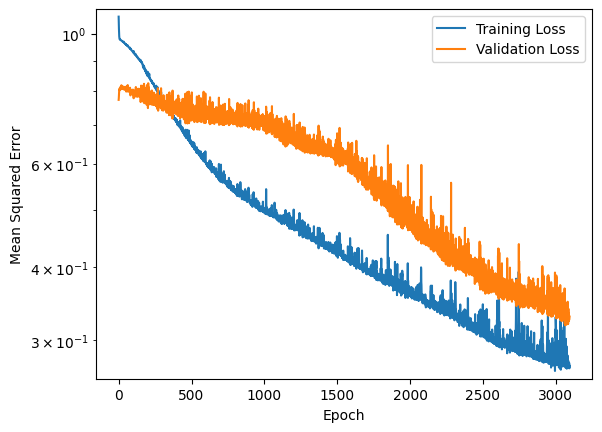


 Evaluate the new model against the test set:
2/2 [==============================] - 0s 4ms/step - loss: 0.3250 - mean_squared_error: 0.3250


{'loss': 0.32499733567237854, 'mean_squared_error': 0.32499733567237854}

In [75]:
# The following variables are the hyperparameters.
learning_rate = 0.0003
epochs = 4000
batch_size = 40
l2_regularization = 0.01
patience = 100

# Specify the label
label_name = "BodyFat"

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.1

dnn_outputs = get_outputs_dnn()

# Establish the model's topography.
my_model = create_model(
    inputs,
    dnn_outputs,
    learning_rate, l2_regularization)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined in our inputs.
epochs, mse, history = train_model(my_model, trainDF, epochs,
                                   batch_size, label_name, patience, validation_split)
plot_the_loss_curve(epochs, mse, history["val_mean_squared_error"])

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in testDF.items()}
test_label = test_bodyfat_normalized(np.array(test_features.pop(label_name))) # isolate the label

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, return_dict=True)

In [84]:
#Output weights
input_layer = my_model.layers[15]
weights, biases = input_layer.get_weights()

weights_table = pd.DataFrame(columns=['Feature', 'Total Weight'])

for feature, i in zip(inputs, weights):
    for j in i:
        j = abs(j)
        if feature not in weights_table['Feature'].values:
            row = pd.DataFrame({'Feature': feature, 'Total Weight': j}, index=[0])
            weights_table = pd.concat([weights_table, row], ignore_index=True)
        else:
            condition = weights_table['Feature'] == feature
            index = weights_table.loc[condition, 'Total Weight'].index
            weights_table.loc[condition, 'Total Weight'] = weights_table.loc[condition, 'Total Weight'][index] + j

weights_table = weights_table.sort_values(by='Total Weight', ascending=False)
weights_table


,Feature,Total Weight
1,BMI,11.87
13,StaticWaistRatio,7.30
3,ChestWaistRatio,6.81
2,ChestNeckRatio,5.05
7,ForearmBicepRatio,3.41
6,ForearmWristRatio,3.38
10,Biceps,3.29
11,Forearm,3.12
0,Age,2.84
4,HipThighRatio,2.81


In [77]:
# Create an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['Row', 'Predicted Body Fat', 'Correct Body Fat', 'Difference +-'])

# Get the mean and variance from the normalization layer
mean = train_bodyfat_normalized.mean.numpy()
variance = train_bodyfat_normalized.variance.numpy()

# Get the minimum and maximum values of the original body fat data
min_value = trainDF['BodyFat'].min()
max_value = trainDF['BodyFat'].max()

# Iterate over the rows of the test dataframe
for index, row in testDF.iterrows():
    test_features = {name: np.array([value]) for name, value in row.items() if name != 'BodyFat'}

    # Get the correct label for the current row
    correct_label = np.array([row['BodyFat']])
    correct_label_normalized = (correct_label - mean) / np.sqrt(variance)

    # Make predictions using the model
    predictions = my_model.predict(test_features, verbose=0)

    predicted_bodyfat_normalized = predictions['dense_output'][0][0]
    predicted_bodyfat = (predicted_bodyfat_normalized * np.sqrt(variance)) + mean
    predicted_bodyfat = np.round(predicted_bodyfat, decimals=1)

    actual_bodyfat = np.round((correct_label_normalized * np.sqrt(variance)) + mean, decimals=1)
    difference = np.round(predicted_bodyfat - actual_bodyfat, 1)
    row_data = pd.DataFrame({'Row': [index],
                             'Predicted Body Fat': [predicted_bodyfat],
                             'Correct Body Fat': [actual_bodyfat],
                             'Difference +-': [difference]})

    # Concatenate the row DataFrame to the result_table
    result_table = pd.concat([result_table, row_data], ignore_index=True)

pd.options.display.max_rows = 100
result_table

,Row,Predicted Body Fat,Correct Body Fat,Difference +-
0,12,[19.0],[20.8],[-1.8]
1,217,[9.3],[7.5],[1.8]
2,73,[10.1],[13.5],[-3.4]
3,187,[22.7],[20.4],[2.3]
4,181,[8.7],[0.0],[8.7]
5,210,[11.3],[7.1],[4.2]
6,165,[21.6],[19.2],[2.4]
7,9,[9.4],[11.7],[-2.3]
8,241,[35.1],[35.0],[0.1]
9,56,[24.8],[20.4],[4.4]
